# Analise Microdados Enem- 2018

O Exame Nacional do Ensino Médio (Enem) é uma prova de admissão à educação superior realizada pelo Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira (INEP), autarquia vinculada ao Ministério da Educação do Brasil, e foi criada em 1998 inicialmente para avaliar a qualidade do ensino médio no país.

In [1]:
import pandas as pd
import matplotlib

In [2]:
#Importação dataset
microdadosEnem = pd.read_csv("dados/enem_2018/DADOS/MICRODADOS_ENEM_2018.csv",sep =';',encoding='ISO-8859-1')


In [3]:
microdadosEnem.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180008202043,2018,5300108,Brasília,53,DF,44.0,M,1.0,1,...,A,A,A,A,A,A,A,A,B,A
1,180007197856,2018,2111102,São João dos Patos,21,MA,23.0,F,0.0,3,...,A,B,A,A,B,A,A,A,A,A
2,180008517434,2018,3530607,Mogi das Cruzes,35,SP,23.0,F,0.0,1,...,A,B,A,A,B,B,B,B,A,A
3,180007661228,2018,2916401,Itapetinga,29,BA,26.0,F,0.0,3,...,A,B,B,A,C,A,B,B,A,A
4,180008787987,2018,2918100,Jeremoabo,29,BA,20.0,M,0.0,0,...,A,B,A,A,B,A,B,B,B,A


In [4]:
microdadosEnem.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [5]:
colunasSelecionadas = [
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24', 'IN_AMPLIADA_18',
       'IN_LEDOR', 'IN_ACESSO', 'IN_TRANSCRICAO', 'IN_LIBRAS',
       'IN_LEITURA_LABIAL', 'IN_MESA_CADEIRA_RODAS',
       'IN_MESA_CADEIRA_SEPARADA', 'IN_APOIO_PERNA', 'IN_GUIA_INTERPRETE',
       'IN_COMPUTADOR', 'IN_CADEIRA_ESPECIAL', 'IN_CADEIRA_CANHOTO',
       'IN_CADEIRA_ACOLCHOADA', 'IN_PROVA_DEITADO', 'IN_MOBILIARIO_OBESO',
       'IN_LAMINA_OVERLAY', 'IN_PROTETOR_AURICULAR', 'IN_MEDIDOR_GLICOSE',
       'IN_MAQUINA_BRAILE', 'IN_SOROBAN', 'IN_MARCA_PASSO', 'IN_SONDA',
       'IN_MEDICAMENTOS', 'IN_SALA_INDIVIDUAL', 'IN_SALA_ESPECIAL',
       'IN_SALA_ACOMPANHANTE', 'IN_MOBILIARIO_ESPECIFICO',
       'IN_MATERIAL_ESPECIFICO', 'IN_NOME_SOCIAL']
microdadosEnemSelecionados = microdadosEnem.filter(items = colunasSelecionadas)
microdadosEnemSelecionados

,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,...,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL
0,Brasília,53,DF,44.0,M,1.0,1,0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,São João dos Patos,21,MA,23.0,F,0.0,3,1,2111102.0,São João dos Patos,...,0,0,0,0,0,0,0,0,0,0
2,Mogi das Cruzes,35,SP,23.0,F,0.0,1,1,4209300.0,Lages,...,0,0,0,0,0,0,0,0,0,0
3,Itapetinga,29,BA,26.0,F,0.0,3,2,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,Jeremoabo,29,BA,20.0,M,0.0,0,1,2800308.0,Aracaju,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5513742,Rio de Janeiro,33,RJ,56.0,F,1.0,1,1,3304557.0,Rio de Janeiro,...,0,0,0,0,0,0,0,0,0,0
5513743,Manaus,13,AM,20.0,F,0.0,3,1,1303403.0,Parintins,...,0,0,0,0,0,0,0,0,0,0
5513744,São Paulo,35,SP,17.0,F,0.0,3,1,3529401.0,Mauá,...,0,0,0,0,0,0,0,0,0,0
5513745,Campinas,35,SP,17.0,F,0.0,1,1,3509502.0,Campinas,...,0,0,0,0,0,0,0,0,0,0


In [6]:
coluna_nome_municipio = microdadosEnemSelecionados['NO_MUNICIPIO_RESIDENCIA']
#numero de participantes por municnipio
coluna_nome_municipio.value_counts().sort_index()

Abadia de Goiás         284
Abadia dos Dourados     176
Abadiânia               344
Abaetetuba             7188
Abaeté                  515
                       ... 
Áurea                    59
Ângulo                   48
Érico Cardoso           138
Óbidos                 1146
Óleo                     48
Name: NO_MUNICIPIO_RESIDENCIA, Length: 5299, dtype: int64

In [7]:
#Numero de participantes por idade
coluna_nu_idade = microdadosEnemSelecionados['NU_IDADE']
coluna_nu_idade.value_counts().sort_index()


10.0       6
11.0      11
12.0      40
13.0     272
14.0    5625
        ... 
87.0       2
88.0       1
89.0       1
90.0       1
98.0       1
Name: NU_IDADE, Length: 82, dtype: int64

<AxesSubplot:>

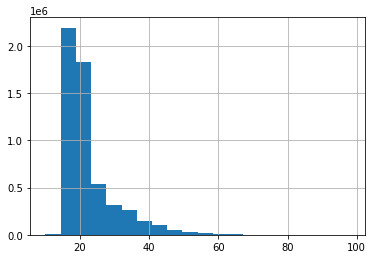

In [8]:
coluna_nu_idade.hist(bins=20)

In [9]:
#numero de participantes por estado
coluna_sg_uf_residencia = microdadosEnemSelecionados['SG_UF_RESIDENCIA']
coluna_sg_uf_residencia.value_counts()

SP    934174
MG    587471
BA    401328
RJ    382078
CE    329406
PE    304302
PA    283861
RS    243555
PR    236533
MA    218462
GO    191029
PB    152049
RN    124039
SC    123933
AM    123755
PI    118350
ES    112173
DF    104531
MT     96762
AL     89670
SE     74633
MS     72319
RO     62266
TO     55145
AP     40109
AC     37785
RR     14029
Name: SG_UF_RESIDENCIA, dtype: int64

In [10]:
#PErcentual participante por sexo
coluna_tp_sexo = microdadosEnemSelecionados['TP_SEXO']
distTpSexo = coluna_tp_sexo.value_counts()
distTpSexo


F    3257703
M    2256044
Name: TP_SEXO, dtype: int64

In [11]:
percentTpSexo =[ 100*x/distTpSexo.sum()for x in distTpSexo]
percentTpSexo

[59.08328764450019, 40.91671235549981]

---------------------------------------------

# Fateres Socioeconomicos


In [12]:
colunasSelecionadas = ['NU_INSCRICAO','NU_NOTA_MT','NU_NOTA_REDACAO','Q001','Q002']
microdadosEnemq001eq002 =microdadosEnem.filter(items =colunasSelecionadas)
microdadosEnemq001eq002.head()

#Retirando os valores com NaN (not a number)
microdadosEnemq001eq002 =microdadosEnemq001eq002.dropna()
microdadosEnemq001eq002.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
1,180007197856,480.3,280.0,B,B
5,180007239581,538.8,580.0,C,D
7,180008090447,733.8,680.0,A,E
8,180008257068,459.0,340.0,D,D
9,180008202044,525.4,740.0,C,C


In [13]:
#Construção dicionario
q001eq002dicionario = {
     'A': 'Nunca estudou',
    'B': 'Não completou a 4° série/5° ano do Ensino Fundamental.',
    'C': 'Completou a 4° série/5° ano, mas não completou a 8° série/9° ano do Ensino Fundamental.',
    'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',
    'E': 'Completou o Ensino Médio, mas não completou a Faculdade.',
    'F': 'Completou a Faculdade, mas não completou a Pós-graduação.',
    'G': 'Completou a Pós-graduação.',
    'H': 'Não sei'}

In [14]:
#tabela com dicionario resposta questâo Q001 e Q002, nivel escolaridade pais ou responsaveis
microdadosEnemq001eq002['NO_Q001'] = [q001eq002dicionario[resp]for resp in microdadosEnemq001eq002.Q001]
microdadosEnemq001eq002['NO_Q002'] = [q001eq002dicionario[resp]for resp in microdadosEnemq001eq002.Q002]
microdadosEnemq001eq002.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_Q001,NO_Q002
1,180007197856,480.3,280.0,B,B,Não completou a 4° série/5° ano do Ensino Fund...,Não completou a 4° série/5° ano do Ensino Fund...
5,180007239581,538.8,580.0,C,D,"Completou a 4° série/5° ano, mas não completou...",Completou a 8ª série/9º ano do Ensino Fundamen...
7,180008090447,733.8,680.0,A,E,Nunca estudou,"Completou o Ensino Médio, mas não completou a ..."
8,180008257068,459.0,340.0,D,D,Completou a 8ª série/9º ano do Ensino Fundamen...,Completou a 8ª série/9º ano do Ensino Fundamen...
9,180008202044,525.4,740.0,C,C,"Completou a 4° série/5° ano, mas não completou...","Completou a 4° série/5° ano, mas não completou..."


In [15]:
print("Q001- Escolaridade Pai ou responsavel")


#distribuiçaõ dos candidatos por escolaridade do Pai
microdadosEnemq001eq002.filter(items=['NU_INSCRICAO','NO_Q001']).groupby('NO_Q001').count().sort_values(by ='NU_INSCRICAO',ascending = False)


Q001- Escolaridade Pai ou responsavel


,NU_INSCRICAO
NO_Q001,
"Completou o Ensino Médio, mas não completou a Faculdade.",1043472
Não completou a 4° série/5° ano do Ensino Fundamental.,813670
"Completou a 4° série/5° ano, mas não completou a 8° série/9° ano do Ensino Fundamental.",549969
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",460454
Não sei,325653
"Completou a Faculdade, mas não completou a Pós-graduação.",311918
Nunca estudou,200902
Completou a Pós-graduação.,187705


In [16]:
print("Q002- Escolaridade Mãe ou responsavel")
#distribuiçaõ dos candidatos por escolaridade da Mãe
microdadosEnemq001eq002.filter(items=['NU_INSCRICAO','NO_Q002']).groupby('NO_Q002').count().sort_values(by ='NU_INSCRICAO',ascending = False)

Q002- Escolaridade Mãe ou responsavel


,NU_INSCRICAO
NO_Q002,
"Completou o Ensino Médio, mas não completou a Faculdade.",1275076
Não completou a 4° série/5° ano do Ensino Fundamental.,606702
"Completou a 4° série/5° ano, mas não completou a 8° série/9° ano do Ensino Fundamental.",515982
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",509545
"Completou a Faculdade, mas não completou a Pós-graduação.",417225
Completou a Pós-graduação.,322696
Nunca estudou,136414
Não sei,110103


In [17]:
print("Q001- Escolaridade Pai ou responsavel")

#Desempenho Redação segundo escolaridade pai
microdadosEnemq001eq002.filter(items=['NU_NOTA_REDACAO','NO_Q001']).groupby('NO_Q001').mean().sort_values(by ='NU_NOTA_REDACAO',ascending = False)


Q001- Escolaridade Pai ou responsavel


,NU_NOTA_REDACAO
NO_Q001,
Completou a Pós-graduação.,652.213740
"Completou a Faculdade, mas não completou a Pós-graduação.",622.431152
"Completou o Ensino Médio, mas não completou a Faculdade.",544.272256
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",511.711832
"Completou a 4° série/5° ano, mas não completou a 8° série/9° ano do Ensino Fundamental.",492.834723
Não sei,474.284161
Não completou a 4° série/5° ano do Ensino Fundamental.,464.490076
Nunca estudou,427.263044


In [18]:
print("Q002- Escolaridade Mãe ou responsavel")
#Desempenho Redação segundo escolaridade Mãe
microdadosEnemq001eq002.filter(items=['NU_NOTA_REDACAO','NO_Q002']).groupby('NO_Q002').mean().sort_values(by ='NU_NOTA_REDACAO',ascending = False)

Q002- Escolaridade Mãe ou responsavel


,NU_NOTA_REDACAO
NO_Q002,
Completou a Pós-graduação.,622.780760
"Completou a Faculdade, mas não completou a Pós-graduação.",601.241249
"Completou o Ensino Médio, mas não completou a Faculdade.",530.016015
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",495.963850
"Completou a 4° série/5° ano, mas não completou a 8° série/9° ano do Ensino Fundamental.",479.675260
Não completou a 4° série/5° ano do Ensino Fundamental.,454.591612
Não sei,447.204163
Nunca estudou,414.232410


-----------------------------------------------------

In [19]:
colunasSelecinadas_whe = ['NU_INSCRICAO','SG_UF_RESIDENCIA','NU_NOTA_MT','NU_NOTA_REDACAO','Q001','Q002']

In [20]:
microdadosEnemq001eq002['SG_UF_RESIDENCIA'] = microdadosEnem.SG_UF_RESIDENCIA

Text(0.03, 0.7, 'A:Nunca estudou\nB:Não completou a 4° série/5° ano do Ensino Fundamental.\nC:Completou a 4° série/5° ano, mas não completou a 8° série/9° ano do Ensino Fundamental.\nD:Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.\nE:Completou o Ensino Médio, mas não completou a Faculdade.\nF:Completou a Faculdade, mas não completou a Pós-graduação.\nG:Completou a Pós-graduação.\nH:Não sei\n')

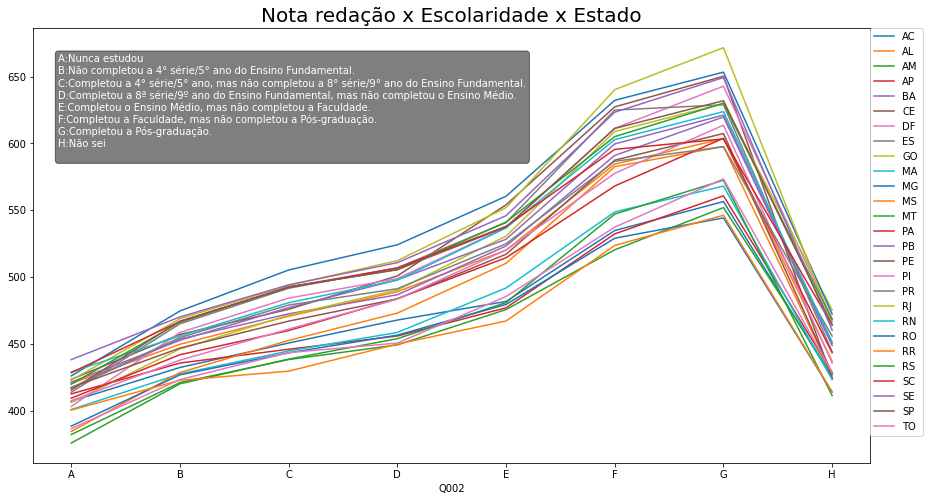

In [21]:
import matplotlib.pyplot as plt
#figura relação entre nivel escolaridade da mãe ou mulher responsavel e nota redação enem brasil.
ax =microdadosEnemq001eq002.filter(items=['SG_UF_RESIDENCIA','Q002','NU_NOTA_REDACAO'])\
.groupby(['Q002','SG_UF_RESIDENCIA'])\
.mean().sort_values(by ='NU_NOTA_REDACAO',ascending = False)\
.unstack().plot(figsize=(15,8))

ax.set_title('Nota redação x Escolaridade x Estado',fontsize = 20)
handles,labels= ax.get_legend_handles_labels()

import re 
edited_labels = [re.search(',\s(.+?)\)',label).group(1) for label in labels]
ax.legend(edited_labels,bbox_to_anchor = (1,1),loc=0,borderaxespad=0.)

textdictQ002 =""
for key,value in q001eq002dicionario.items():
    textdictQ002 = textdictQ002 +"{key}:{value}\n".format(key=key,value=value)
    
ax.text(0.03,0.7, textdictQ002,transform=ax.transAxes,fontsize=10,color='white',
       bbox={'boxstyle':'round','facecolor':'black','alpha':0.5})

Text(0.03, 0.7, 'A:Nunca estudou\nB:Não completou a 4° série/5° ano do Ensino Fundamental.\nC:Completou a 4° série/5° ano, mas não completou a 8° série/9° ano do Ensino Fundamental.\nD:Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.\nE:Completou o Ensino Médio, mas não completou a Faculdade.\nF:Completou a Faculdade, mas não completou a Pós-graduação.\nG:Completou a Pós-graduação.\nH:Não sei\n')

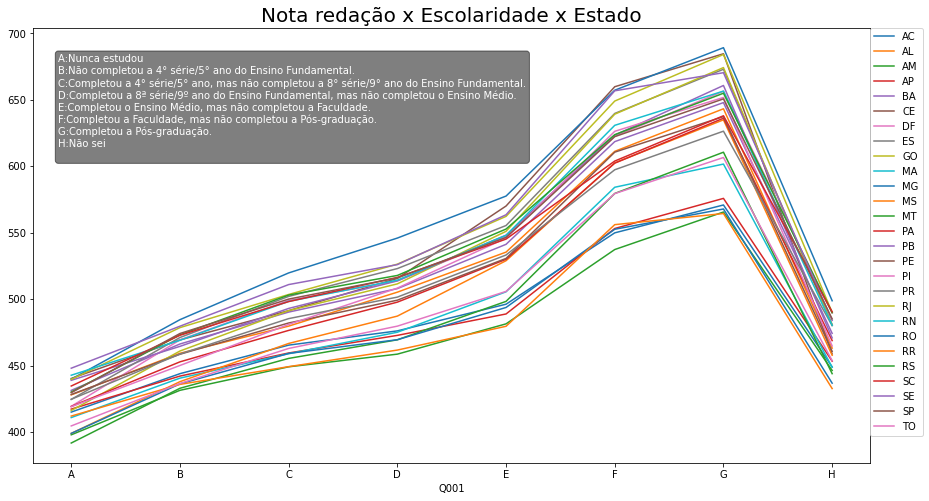

In [22]:
import matplotlib.pyplot as plt
#figura relação entre nivel escolaridade do Pai ou homem responsavel e nota redação enem brasil.
ax =microdadosEnemq001eq002.filter(items=['SG_UF_RESIDENCIA','Q001','NU_NOTA_REDACAO'])\
.groupby(['Q001','SG_UF_RESIDENCIA'])\
.mean().sort_values(by ='NU_NOTA_REDACAO',ascending = False)\
.unstack().plot(figsize=(15,8))

ax.set_title('Nota redação x Escolaridade x Estado',fontsize = 20)
handles,labels= ax.get_legend_handles_labels()

import re 
edited_labels = [re.search(',\s(.+?)\)',label).group(1) for label in labels]
ax.legend(edited_labels,bbox_to_anchor = (1,1),loc=0,borderaxespad=0.)

textdictQ002 =""
for key,value in q001eq002dicionario.items():
    textdictQ002 = textdictQ002 +"{key}:{value}\n".format(key=key,value=value)
    
ax.text(0.03,0.7, textdictQ002,transform=ax.transAxes,fontsize=10,color='white',
       bbox={'boxstyle':'round','facecolor':'black','alpha':0.5})

Comparação entre IDHM (Índice de Desenvolvimento Humano municipio)e a redação do Enem

In [23]:
microdadosEnemCsv=microdadosEnem.filter(items=['CO_MUNICIPIO_RESIDENCIA','NO_MUNICIPIO_RESIDENCIA','CO_UF_RESIDENCIA','SG_UF_RESIDENCIA',
                                               'NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO'])

mediaEnemPorMunicipio = microdadosEnemCsv.groupby(['CO_MUNICIPIO_RESIDENCIA','NO_MUNICIPIO_RESIDENCIA',
                                                    'CO_UF_RESIDENCIA','SG_UF_RESIDENCIA'],as_index=False).mean()
mediaEnemPorMunicipio.to_csv('mediaEnemPorMunicipio.csv')

In [24]:
mediaEnemPorMunicipio = pd.read_csv('dados/mediaEnemPorMunicipio.csv',sep=',',index_col = 0)
atlasHumano=pd.read_csv('dados/enem_2018/DADOS/idhm_municipios_2010M2.csv',sep=';')

In [25]:
mediaEnemIDHM =pd.merge(mediaEnemPorMunicipio,atlasHumano,how='left',left_on=['CO_MUNICIPIO_RESIDENCIA'],right_on=['codMunicipio'])

In [26]:
#conversão de string para float
mediaEnemIDHM['IDHM'] = mediaEnemIDHM['IDHM'].apply(lambda x: float(str(x).replace(',','.')))
mediaEnemIDHM['IDHM_R'] = mediaEnemIDHM['IDHM_R'].apply(lambda x: float(str(x).replace(',','.')))
mediaEnemIDHM['IDHM_L'] = mediaEnemIDHM['IDHM_L'].apply(lambda x: float(str(x).replace(',','.')))
mediaEnemIDHM['IDHM_E'] = mediaEnemIDHM['IDHM_E'].apply(lambda x: float(str(x).replace(',','.')))


In [27]:
mean_redacao = mediaEnemIDHM.NU_NOTA_REDACAO.mean()
mean_IDHM = mediaEnemIDHM.IDHM.mean()

In [28]:
#media IDHM e media nota redação
mean_redacao
mean_IDHM

0.6592001078748652

Quadrante 1: 33.73429084380611%, Baixo IDHM,Baixa nota
Quadrante 2: 17.378815080789945%, Alto IDHM,Baixa nota
Quadrante 3: 35.09874326750449%, Alto IDHM,alta nota
Quadrante 4: 13.644524236983843%, Baixo IDHM,Alta nota


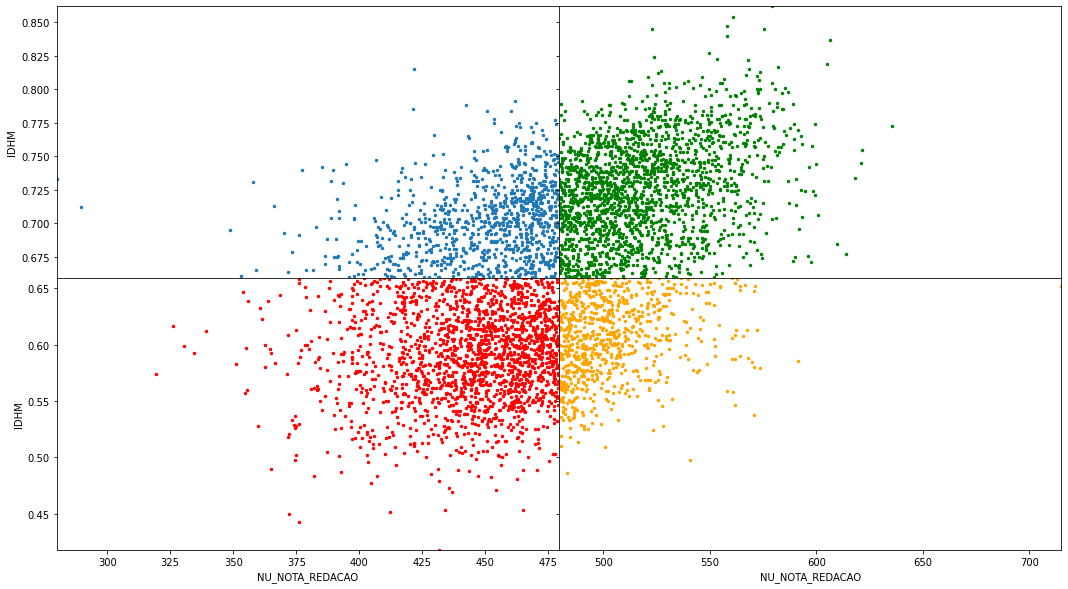

In [29]:
idhmMunicipio = mediaEnemIDHM.IDHM
notaMunicipio = mediaEnemIDHM.NU_NOTA_REDACAO

quadrante1= (idhmMunicipio < mean_IDHM)&(notaMunicipio < mean_redacao)
quadrante2= (idhmMunicipio > mean_IDHM)&(notaMunicipio < mean_redacao)
quadrante3= (idhmMunicipio > mean_IDHM)&(notaMunicipio > mean_redacao)
quadrante4= (idhmMunicipio < mean_IDHM)&(notaMunicipio > mean_redacao)

fig , ax = plt.subplots(2,2,figsize=(18,10),sharex ='col',sharey ='row')
plt.subplots_adjust(wspace = 0,hspace = 0)

minRedacao = mediaEnemIDHM.NU_NOTA_REDACAO.min()
maxRedacao = mediaEnemIDHM.NU_NOTA_REDACAO.max()
minIDHM = mediaEnemIDHM.IDHM.min()
maxIDHM = mediaEnemIDHM.IDHM.max()


mediaEnemIDHM1 = mediaEnemIDHM[quadrante1]
mediaEnemIDHM1.plot.scatter('NU_NOTA_REDACAO','IDHM',color ='red',s=6,ax = ax[1,0], xlim = (minRedacao,mean_redacao), ylim= (minIDHM , mean_IDHM))
print("Quadrante 1: {}%, Baixo IDHM,Baixa nota".format(100*len(mediaEnemIDHM1.IDHM)/len(idhmMunicipio)))

mediaEnemIDHM2 = mediaEnemIDHM[quadrante2]
mediaEnemIDHM2.plot.scatter('NU_NOTA_REDACAO','IDHM',s=6,ax = ax[0,0], xlim = (minRedacao,mean_redacao), ylim=(mean_IDHM,maxIDHM))
print("Quadrante 2: {}%, Alto IDHM,Baixa nota".format(100*len(mediaEnemIDHM2.IDHM)/len(idhmMunicipio)))

mediaEnemIDHM3 = mediaEnemIDHM[quadrante3]
mediaEnemIDHM3.plot.scatter('NU_NOTA_REDACAO','IDHM',color ='green',s=6,ax = ax[0,1], xlim = (mean_redacao,maxRedacao), ylim=( mean_IDHM, maxIDHM ))
print("Quadrante 3: {}%, Alto IDHM,alta nota".format(100*len(mediaEnemIDHM3.IDHM)/len(idhmMunicipio)))

mediaEnemIDHM4 = mediaEnemIDHM[quadrante4]
mediaEnemIDHM4.plot.scatter('NU_NOTA_REDACAO','IDHM',color ='orange',s=6,ax = ax[1,1], xlim = (mean_redacao,maxRedacao), ylim=( minIDHM , mean_IDHM))
print("Quadrante 4: {}%, Baixo IDHM,Alta nota".format(100*len(mediaEnemIDHM4.IDHM)/len(idhmMunicipio)))


------------------------------------------------------------

"Nota media Enem por municipio"


In [30]:
municipios = pd.read_csv('dados/enem_2018/DADOS/municipios.csv')
enem_idhm_municipios = pd.merge(mediaEnemIDHM,municipios,
                                how='left',left_on=['CO_MUNICIPIO_RESIDENCIA'],right_on=['codigo_ibge'])
enem_idhm_municipios

,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,codMunicipio,...,IDHM,IDHM_R,IDHM_L,IDHM_E,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
0,1100015,Alta Floresta D'Oeste,11,RO,480.653117,554.668286,504.495652,519.142005,460.051151,1100015,...,0.641,0.657,0.763,0.526,1100015,Alta Floresta D'Oeste,-11.92830,-61.9953,0,11
1,1100023,Ariquemes,11,RO,476.134097,549.811621,508.440787,508.070983,448.096330,1100023,...,0.702,0.716,0.806,0.600,1100023,Ariquemes,-9.90571,-63.0325,0,11
2,1100031,Cabixi,11,RO,468.973846,546.226389,493.195833,505.800000,445.277778,1100031,...,0.650,0.650,0.757,0.559,1100031,Cabixi,-13.49450,-60.5520,0,11
3,1100049,Cacoal,11,RO,484.373259,559.568811,518.981172,522.344497,471.500169,1100049,...,0.718,0.727,0.821,0.620,1100049,Cacoal,-11.43430,-61.4562,0,11
4,1100056,Cerejeiras,11,RO,477.077656,556.285172,511.496552,507.730037,459.310345,1100056,...,0.692,0.688,0.799,0.602,1100056,Cerejeiras,-13.18700,-60.8168,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,5222005,Vianópolis,52,GO,493.409052,552.642259,517.681172,525.894397,480.083682,5222005,...,0.712,0.710,0.818,0.622,5222005,Vianópolis,-16.74050,-48.5159,0,52
5566,5222054,Vicentinópolis,52,GO,469.161429,523.104819,487.281928,506.642857,419.277108,5222054,...,0.684,0.707,0.804,0.562,5222054,Vicentinópolis,-17.73220,-49.8047,0,52
5567,5222203,Vila Boa,52,GO,459.281250,517.789474,466.771053,494.637500,353.684211,5222203,...,0.647,0.619,0.818,0.534,5222203,Vila Boa,-15.03870,-47.0520,0,52
5568,5222302,Vila Propício,52,GO,455.734694,513.081905,473.814286,476.962245,392.380952,5222302,...,0.634,0.629,0.802,0.505,5222302,Vila Propício,-15.45420,-48.8819,0,52


Nota media Enem por municipio


<AxesSubplot:title={'center':'Nota Media Redação por municipio'}, xlabel='longitude', ylabel='latitude'>

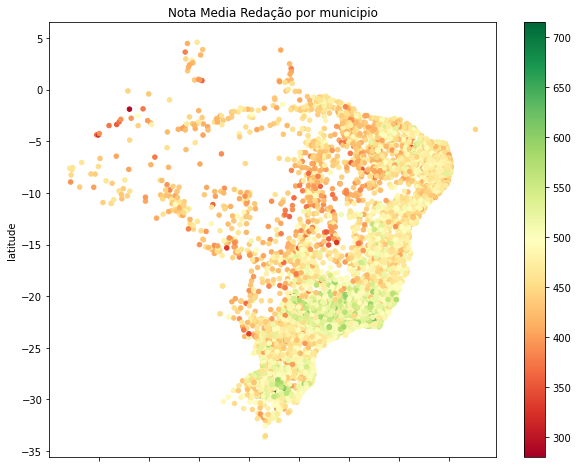

In [31]:
print("Nota media Enem por municipio")
enem_idhm_municipios.plot.scatter(y='latitude',x='longitude',
                                  c=enem_idhm_municipios['NU_NOTA_REDACAO'],
                                  cmap='RdYlGn',
                                  figsize=(10,8),
                                 title ="Nota Media Redação por municipio")

Nota media Enem por municipio


<AxesSubplot:title={'center':'Nota Matematica'}, xlabel='longitude', ylabel='latitude'>

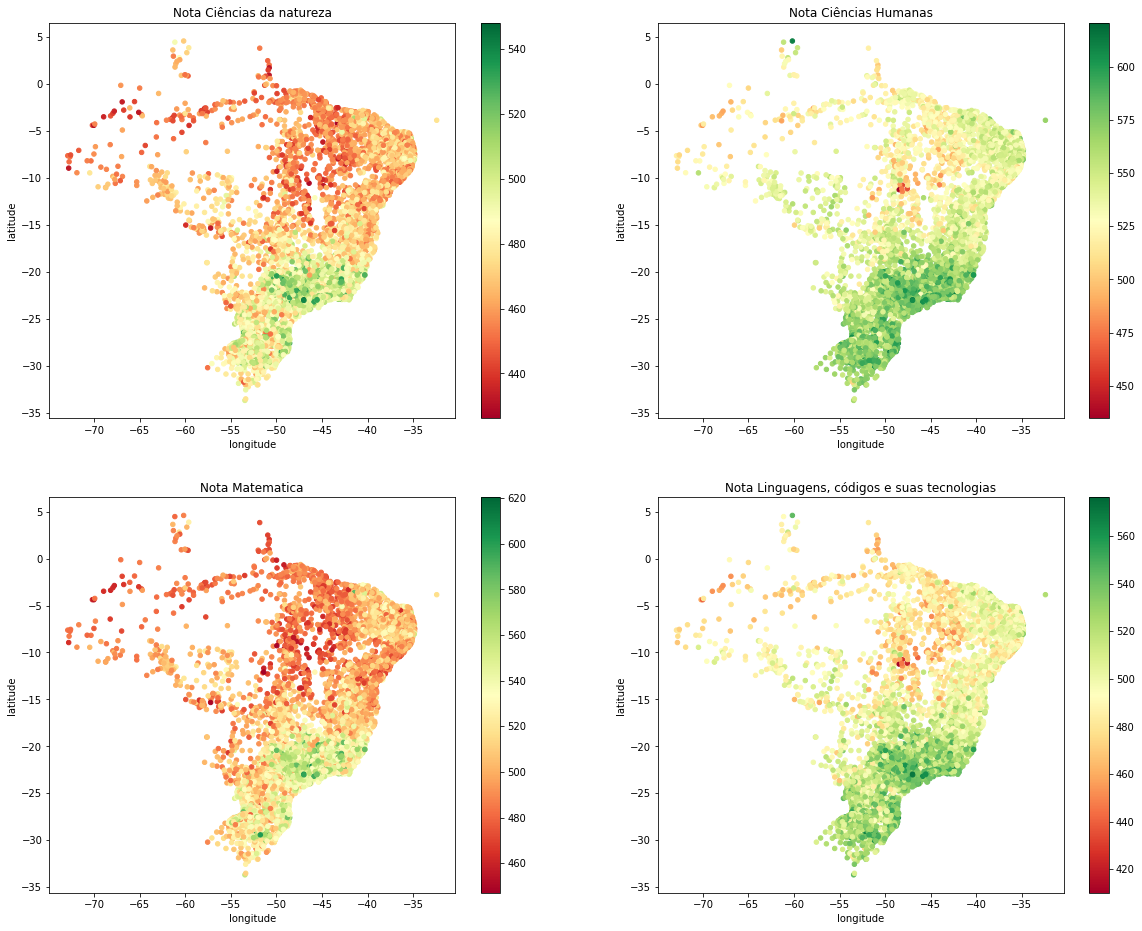

In [32]:
fig,ax = plt.subplots(2,2, figsize=(20,16))

print("Nota media Enem por municipio")



enem_idhm_municipios.plot.scatter(y='latitude',x='longitude',
                                  c=enem_idhm_municipios['NU_NOTA_CN'],
                                  cmap='RdYlGn',
                                 title ="Nota Ciências da natureza",ax=ax[0,0])


enem_idhm_municipios.plot.scatter(y='latitude',x='longitude',
                                  c=enem_idhm_municipios['NU_NOTA_CH'],
                                  cmap='RdYlGn',
                                 title ="Nota Ciências Humanas",ax=ax[0,1])

enem_idhm_municipios.plot.scatter(y='latitude',x='longitude',
                                  c=enem_idhm_municipios['NU_NOTA_LC'],
                                  cmap='RdYlGn',
                                 title ="Nota Linguagens, códigos e suas tecnologias",ax=ax[1,1])

enem_idhm_municipios.plot.scatter(y='latitude',x='longitude',
                                  c=enem_idhm_municipios['NU_NOTA_MT'],
                                  cmap='RdYlGn',
                                 title ="Nota Matematica",ax=ax[1,0])

--------------------------------------

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
coluna_machine = ['NU_NOTA_REDACAO','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT']
coluna_machine_P = enem_idhm_municipios.filter(items = coluna_machine)

In [35]:

X = coluna_machine_P.drop(columns='NU_NOTA_REDACAO')
y = coluna_machine_P['NU_NOTA_REDACAO']
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

(5570, 4) (5570,)


In [36]:
print(f"Tamanho de X_train: {X_train.shape}")
print(f"Tamanho de X_test: {X_test.shape}")
print(f"Tamanho de y_train: {y_train.shape}")
print(f"Tamanho de y_test: {y_test.shape}")

Tamanho de X_train: (3899, 4)
Tamanho de X_test: (1671, 4)
Tamanho de y_train: (3899,)
Tamanho de y_test: (1671,)


In [37]:
from sklearn.linear_model import SGDRegressor

clf = SGDRegressor(loss='squared_loss',
                   learning_rate='constant',
                   max_iter=10,
                   eta0=0.01,
                   verbose=1,
                   tol=None,
                   random_state=123)

In [38]:
clf.fit(X_train, y_train)

-- Epoch 1
Norm: 9581378399199.50, NNZs: 4, Bias: -12185571036.660786, T: 3899, Avg. loss: 18675693563233384197945737347072.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 7397515797184.69, NNZs: 4, Bias: 30304423393.557171, T: 7798, Avg. loss: 18786935548341446905029342527488.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 8934273787601.85, NNZs: 4, Bias: 40304423393.557175, T: 11697, Avg. loss: 18513921830649693118485973958656.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 3665906611326.65, NNZs: 4, Bias: 30304423393.557175, T: 15596, Avg. loss: 18919133866052292592778350690304.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 5941342636062.10, NNZs: 4, Bias: 40304423393.557175, T: 19495, Avg. loss: 18831865445487918153979339472896.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 6122475232972.93, NNZs: 4, Bias: 30304423393.557175, T: 23394, Avg. loss: 18698287787556692388398546026496.000000
Total training time: 0.00 seconds.
-- Ep

SGDRegressor(learning_rate='constant', max_iter=10, random_state=123, tol=None,
             verbose=1)

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = clf.predict(X_test)

print(f"Acurácia de Teste: ±{mean_absolute_error(y_test, y_pred):1.0f}")

Acurácia de Teste: ±845965594241482
